<a href="https://colab.research.google.com/github/Madhu-271005/Launched-Global-Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [2]:
data = pd.read_csv("/content/mushrooms Classification Dataset.csv")
print(data.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [3]:
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.head())


   class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0     True        False        False        False        False         True   
1    False        False        False        False        False         True   
2    False        False        False        False        False        False   
3     True        False        False        False        False         True   
4    False        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0          False           True          False        False  ...   
1          False           True          False        False  ...   
2          False           True          False        False  ...   
3          False          False           True        False  ...   
4          False           True          False        False  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0         False          True         False 

In [4]:
X = data_encoded.drop("class_p", axis=1)
y = data_encoded["class_p"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = dt_model.predict(X_test)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



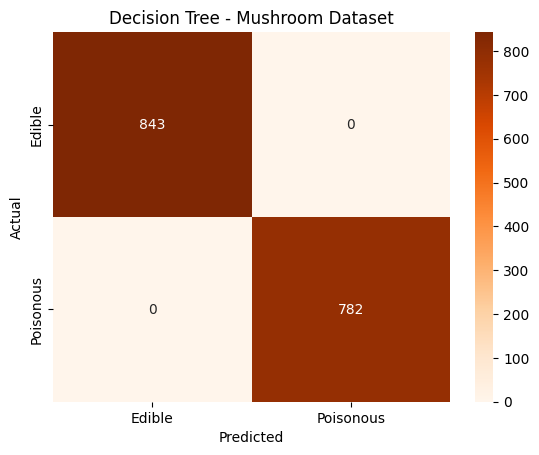

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
            xticklabels=["Edible","Poisonous"],
            yticklabels=["Edible","Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Mushroom Dataset")
plt.show()


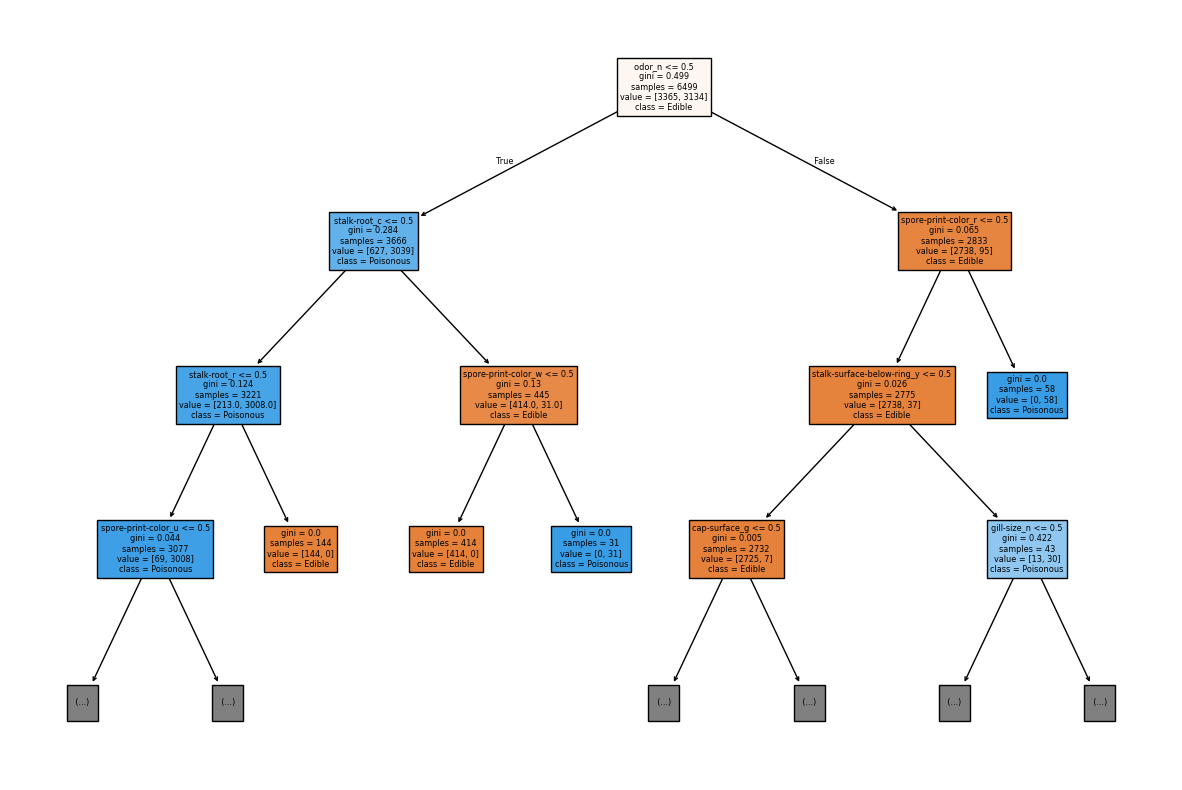

In [9]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Edible","Poisonous"], max_depth=3)
plt.show()
